In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

class1_plot = np.ones((100,4))
class2_plot = np.ones((100,4))
total_data = np.ones((200,4))
class1 = list(class1_plot)
class2 = list(class2_plot)
total_data = list(total_data)

In [2]:
read_data = open("class1.txt", "r")
file_data = read_data.readlines()
print(len(file_data))
for i in range(len(file_data)):
    file_data[i] = file_data[i].replace('\n', '')
    file_data[i] = file_data[i].split(',')
    if (i != 0):
        class1[i-1][1] = file_data[i][0]
        class1[i-1][2] = file_data[i][1]
        total_data[i-1] = class1[i-1]
        
read_data.close()
read_data = open("class2.txt", "r")
file_data = read_data.readlines()
print(len(file_data))

for i in range(len(file_data)):
    file_data[i] = file_data[i].replace('\n', '')
    file_data[i] = file_data[i].split(',')
    if (i != 0):
        class2[i-1][1] = file_data[i][0]
        class2[i-1][2] = file_data[i][1]
        class2[i-1][3] = -1
        total_data[i+99] = class2[i-1]

#print(type(total_data))

101
101


In [3]:
print(type(total_data))
countone = 0
countzero = 0

from random import shuffle
shuffle(total_data)

for i in range(len(total_data)):
    if total_data[i][3] == 1:
        countone += 1
    else:
        countzero += 1

print(countone)
print(countzero)

#print(total_data)

<class 'list'>
100
100


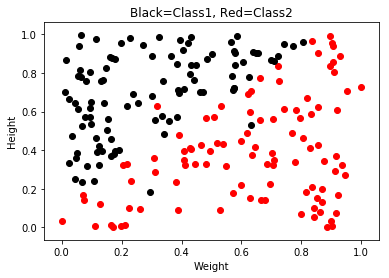

In [4]:
plt.scatter(class2_plot[:,1], class2_plot[:,2], color = 'red')
plt.scatter(class1_plot[:,1], class1_plot[:,2], color='black')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Black=Class1, Red=Class2')
plt.show()

In [19]:
def initial_weights():
    weights = np.ones(3)
    for i in range(3):
        weights[i] = np.random.uniform(-1,1)
    return weights

def gradientDescent(data, eta, iterations, error_threshold, test_data):
    # k =1, randomly initialize wi(k)
    weights = initial_weights()
    print(weights)
    error_plot = []
    test_errors = []
    k = 0
    # Calculate E(W)
    error = 0
    for xx in range(len(data)):
        error += (data[xx][3] - sum(data[xx][:3] * weights))**2
    
    error = error / len(data)
    
    print("STARTING ERROR: " + str(error) + "\n")
    error_rate = 9999
    niter = 0
    shuffle(data)
    while (error_rate > error_threshold and niter < iterations):
        total_error = 0
        delta_w = [0,0,0]
        
        #calculate error and delta_w
        for i in range(len(data)):
            output = sum(weights * data[i][:3])
            label = data[i][3]
            squared_error = (label - output)**2
            total_error += squared_error
            
            #update delta_w
            for j in range(3):
                delta_w[j] += eta*(label-output)*data[i][j]
                
        #apply delta_w to new weights
        for j in range(len(weights)):
            weights[j] += (delta_w[j] / len(data))
        error_rate = (total_error / len(data))
        error_plot.append(error_rate)
        niter += 1
        
        # calculate test errors
        correct = 0
        incorrect = 0
        for i in range(len(test_data)):
            v = sum(weights * test_data[i][:3])
            output = 1 if v >= 0 else -1
            if (output == test_data[i][3]):
                correct += 1
            else:
                incorrect += 1
        test_error_rate = incorrect / (correct+incorrect)
        test_errors.append(test_error_rate)
        
    print("FINAL ERROR: " + str(error_rate))
    return [weights, error_plot, test_errors]

In [20]:
#Learning Rate 0.05, Error Threshold 0.1, Iteration 2000
print(type(total_data))

train = total_data[:160]
test = total_data[160:]

out = gradientDescent(train, 0.05, 2000, 0.01, test)
final_weights = out[0]
error_plot = out[1]
test_errors = out[2]
print("\n")
print(final_weights)

<class 'list'>
[ 0.26569984 -0.5468084  -0.2636161 ]
STARTING ERROR: 0.953775824538087

FINAL ERROR: 0.38204616282284276


[-0.12057345 -1.92374747  1.85128631]


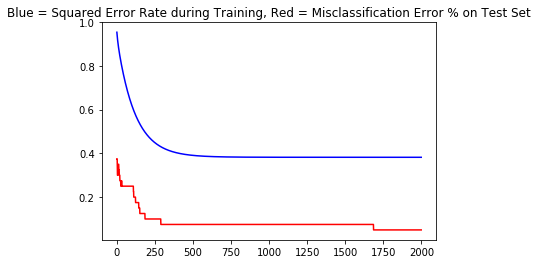

In [22]:
plt.plot(error_plot, color = 'blue')
plt.plot(test_errors, color = 'red')
plt.title('Blue = Squared Error Rate during Training, Red = Misclassification Error % on Test Set')
plt.show()

1.039140981987705
0.06512955265823181


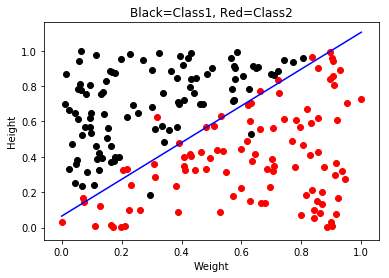

In [23]:
slope = final_weights[1] / final_weights[2] * -1
intercept = final_weights[0] / final_weights[2] * -1

print(slope)
print(intercept)
def boundary(x, slope, intercept):
    return slope*x+intercept

plt.scatter(class2_plot[:,1], class2_plot[:,2], color = 'red')
plt.scatter(class1_plot[:,1], class1_plot[:,2], color='black')
x = np.linspace(0,1, 10)
plt.plot(x, boundary(x, slope, intercept), color = 'blue')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Black=Class1, Red=Class2')
plt.show()

In [24]:
correct = 0
incorrect = 0
for i in range(len(test)):
    v = sum(final_weights * test[i][:3])
    output = 1 if v >= 0 else -1
    if (output == test[i][3]):
        correct += 1
    else:
        incorrect += 1

In [25]:
print(correct / (correct+incorrect)*100)

95.0
